<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team44/blob/main/Reto_Entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tecnológico de Monterrey**

Maestría en Inteligencia Artificial Aplicada

> Curso: Ciencia y Analítica de Datos

> Entregable : Reto Entrega 1 Limpieza, análisis, visualización y kmeans 

>Fecha: 14/11/2022

>Profesores:

>* María de la Paz Rico Fernández
>* Roberto Antonio Guevara González

> Alumnos:
*   LUIS ALFONSO SABANERO ESQUIVEL - A01273286
*   AQUILES YONATAN ARMENTA HERNANDEZ - A01793252

https://github.com/PosgradoMNA/actividades-del-projecto-team44

# CALIDAD DEL AGUA SUBTERRANEA

## DESCRIPCION DE LA BASE DE DATOS:

* Base de Datos: Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv

* Total de Registros: 1068

* Descripción: La siguiente base de datos contiene el registro de todos los Pozos, Cenotes, Manantiales, Norias y Cenotes de Bombeo que estan registrados por CONAGUA en la republica Mexicana. La información esta segmentada por Estados, Municipios y Acuiferos.
Adicional esta Base de informacion contiene la latitud y longuitud y la calidad en la que se encuentra el agua, de igual manera contiene indicadores que nos indican si el agua se encuentra contaminada con algun tipo de contaminante y por ultimo tenemos un semaforo que dependiendo del numero de contaminantes este se pinta de Verde, Amarillo o Rojo.

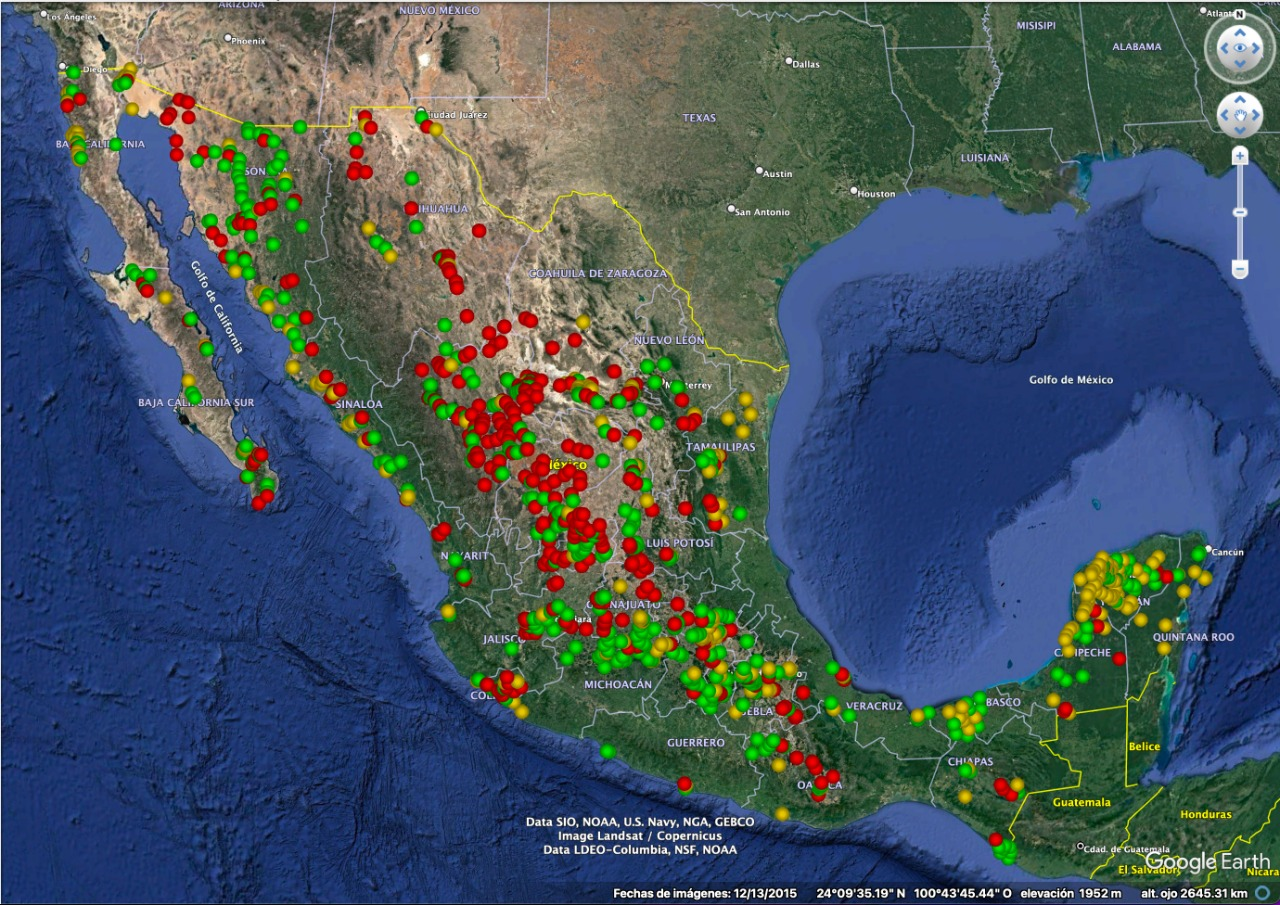

## INSTALACION COMPONENTES ADICIONALES

In [ ]:
!pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## LIBRERIAS 

In [150]:
# IMPLEMENTACION DE LIBRERIAS PARA MANIPUACION DE LA BASE DE DATOS ASI COMO LA VISUALIZACION DE LA INFORMACION.
import pandas as pd   
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

## LECTURA DEL DATASET, HEAD, DESCRIBE , INFO Y ISNULL

In [123]:
# LECTURA DEL ARCHIVO CON LA INFORMACION, ASI COMO LA VISUALIZACION DE LOS PRIMEROS REGISTROS.
df_subterraneo=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df_subterraneo.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [124]:
# DESCRIBE DE LA INFORMACION PARA DETERMINAR LA CANTIDAD DE LOS REGISTROS Y EL COMPORTAMIENTO DE LA MUESTRA
df_subterraneo.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [125]:
# INFORMACION DE LAS COLUMNAS DEL DATAFRAME, ASI COMO EL TIPO DE DATO 
df_subterraneo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [126]:
# IDENTIFICAMOS SI EXISTEN ELEMENTOS NULL POR COLUMNA
df_subterraneo.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

## ELIMINACION DE COLUMNAS 

In [127]:
subterranero_copy=df_subterraneo.copy()
# ELIMINAMOS LA INFORMACION QUE CONTIENE INFORMACION NULL Y QUE NO TIENE CASO MAANTENER YA QUE YA EXISTEN
# INDICADORES QUE NOS INDICAN SI SE ENCUENTRA CONTAMINADA Y NO ES NECESARIO REALIZAR NUEVAMENTE EL CALCULO
# LOS VALORES SI O NO DE LOS CONTAMINANTES QUE ESTAN EN OTRAS COLUMNAS SON NECESARIOS PARA ESTA PRACTICA.
subterranero_copy.drop(columns="SDT_mg/L",inplace=True)
subterranero_copy.drop(columns="PERIODO",inplace=True) 
subterranero_copy.drop(columns="CLAVE",inplace=True)
subterranero_copy.drop(columns="ALC_mg/L",inplace=True)
subterranero_copy.drop(columns="CONDUCT_mS/cm",inplace=True)
subterranero_copy.drop(columns="SDT_M_mg/L",inplace=True)
subterranero_copy.drop(columns="FLUORUROS_mg/L",inplace=True)
subterranero_copy.drop(columns="DUR_mg/L",inplace=True)
subterranero_copy.drop(columns="COLI_FEC_NMP/100_mL",inplace=True) 
subterranero_copy.drop(columns="N_NO3_mg/L",inplace=True) 
subterranero_copy.drop(columns="AS_TOT_mg/L",inplace=True) 
subterranero_copy.drop(columns="CD_TOT_mg/L",inplace=True) 
subterranero_copy.drop(columns="CR_TOT_mg/L",inplace=True) 
subterranero_copy.drop(columns="HG_TOT_mg/L",inplace=True) 
subterranero_copy.drop(columns="MN_TOT_mg/L",inplace=True) 
subterranero_copy.drop(columns="FE_TOT_mg/L",inplace=True)
subterranero_copy.drop(columns="PB_TOT_mg/L",inplace=True) 


# LOS DATOS COMO ESTADO , MUNICIPIO, ACUIFERO , SITIO Y ORGANISMO DE CUENCA, SE ELIMINAN, YA QUE
# TENEMOS LA LATITUD Y LA LONGITUD PARA PODERLOS POSICIONAR EN UN MAPA.
subterranero_copy.drop(columns="SITIO",inplace=True) 
subterranero_copy.drop(columns="ORGANISMO_DE_CUENCA",inplace=True) 
subterranero_copy.drop(columns="MUNICIPIO",inplace=True) 
subterranero_copy.drop(columns="ACUIFERO",inplace=True) 
subterranero_copy.drop(columns="ESTADO",inplace=True)

#ELIMINADOS COLUMNAS CUMPLE DEBIDO A UNA QUE SE TIENE CORRELACIONES FUERTES 1 CON OTRAS COLUMNAS
subterranero_copy.drop(columns="CUMPLE_CON_ALC",inplace=True)
subterranero_copy.drop(columns="CUMPLE_CON_COND",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_SDT_ra",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_SDT_salin",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_FLUO",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_DUR",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_CF",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_NO3",inplace=True)
subterranero_copy.drop(columns="CUMPLE_CON_AS",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_CD",inplace=True)
subterranero_copy.drop(columns="CUMPLE_CON_CR",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_HG",inplace=True)
subterranero_copy.drop(columns="CUMPLE_CON_PB",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_MN",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_FE",inplace=True)  


## IMPRESION DE CORDENADAS

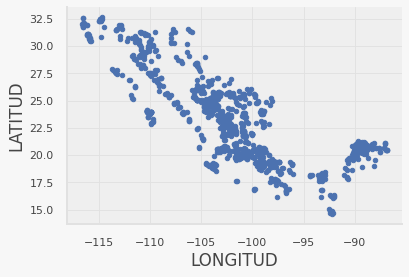

In [128]:
# IMPRIMIMOS LAS CORDENADAS DE LA MUSTRA PARA VISUALIZAR COMO SE VE EN EL MAPA
df_subterraneo.plot.scatter('LONGITUD','LATITUD')

## USO DE ZIP

In [129]:
# SE CREA UNA LISTA CON LAS COORDENADAS Y SE ELIMINAN LAS COLUMNAS ANTES VISUALIZADAS 
# PARA AGREGARLAS A UNA LISTA CONVERTIDA ZIP.
subterranero_copy["COORDENADAS"] = list(zip(subterranero_copy.LONGITUD, subterranero_copy.LATITUD))
subterranero_copy.drop(columns="LONGITUD",inplace=True) 
subterranero_copy.drop(columns="LATITUD",inplace=True) 
subterranero_copy['COORDENADAS'] = subterranero_copy['COORDENADAS'].apply(Point)
subterranero_copy.head()

,SUBTIPO,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE,SEMAFORO,CONTAMINANTES,COORDENADAS
0,POZO,Alta,Permisible para riego,Cultivos sensibles,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,NaN,POINT (-102.0221 22.20887)
1,POZO,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Buena calidad,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,NaN,POINT (-102.20075 21.99958)
2,POZO,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Alta,Potable - Dura,Potable - Excelente,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Rojo,"FLUO,AS,",POINT (-102.28801 22.36685)
3,POZO,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,NaN,POINT (-102.29449 22.18435)
4,POZO,Alta,Permisible para riego,Cultivos con manejo especial,Ligeramente salobres,Baja,Potable - Dura,Aceptable,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Rojo,"NO3,",POINT (-110.2448 23.45138)


## LIMPIEZA Y ESTANDARIZACION

In [130]:
# CONVERTIMOS LOS VALORES DE CALIDAD_ALC POR VALORES NUMERICOS , Y SE ESTANDARIZA UN VALOR COMO BAJO
# PARA TENER SOLO CATEGORIAS DE ALTA , MEDIA Y BAJA.
subterranero_copy['CALIDAD_ALC'].fillna(1,inplace=True)  # REMPLAZAMOS NULOS POR UN VALOR DEFAULT
subterranero_copy['CALIDAD_ALC'].replace(['Alta'],0,inplace=True)
subterranero_copy['CALIDAD_ALC'].replace(['Media'],1,inplace=True)
subterranero_copy['CALIDAD_ALC'].replace(['Baja'],2,inplace=True)
subterranero_copy['CALIDAD_ALC'].replace(['Indeseable como FAAP'],2,inplace=True) 

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_ALC'].unique()

array([0, 1, 2])

In [131]:
#CONVERTIMOS LA COLUMNA CONTAMINANTES A BINARIA 
subterranero_copy['CONTAMINANTES'].fillna(0,inplace=True)
for i in subterranero_copy['CONTAMINANTES'].unique():
    if i!=0:
        subterranero_copy['CONTAMINANTES'].replace([i],1,inplace=True)

subterranero_copy['CONTAMINANTES'].unique()

array([0, 1])

In [132]:
# CONVERTIMOS LOS VALORES DE CALIDAD_CONDUC POR VALORES NUMERICOS
subterranero_copy['CALIDAD_CONDUC'].fillna(3,inplace=True) # REMPLAZAMOS NULOS POR UN VALOR DEFAULT
subterranero_copy['CALIDAD_CONDUC'].replace(['Excelente para riego'],0,inplace=True)
subterranero_copy['CALIDAD_CONDUC'].replace(['Permisible para riego'],1,inplace=True)
subterranero_copy['CALIDAD_CONDUC'].replace(['Buena para riego'],2,inplace=True)
subterranero_copy['CALIDAD_CONDUC'].replace(['Dudosa para riego'],3,inplace=True)
subterranero_copy['CALIDAD_CONDUC'].replace(['Indeseable para riego'],4,inplace=True)

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_CONDUC'].unique()

array([1, 2, 3, 4, 0])

In [133]:
# CONVERTIMOS LOS VALORES DE CALIDAD_SDT_ra POR VALORES NUMERICOS
subterranero_copy['CALIDAD_SDT_ra'].fillna(3,inplace=True) # REMPLAZAMOS NULOS POR UN VALOR DEFAULT
subterranero_copy['CALIDAD_SDT_ra'].replace(['Cultivos sensibles'],0,inplace=True)
subterranero_copy['CALIDAD_SDT_ra'].replace(['Excelente para riego'],1,inplace=True)
subterranero_copy['CALIDAD_SDT_ra'].replace(['Cultivos con manejo especial'],2,inplace=True)
subterranero_copy['CALIDAD_SDT_ra'].replace(['Cultivos tolerantes'],3,inplace=True)
subterranero_copy['CALIDAD_SDT_ra'].replace(['Indeseable para riego'],4,inplace=True)

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_SDT_ra'].unique()

array([0, 1, 2, 3, 4])

In [134]:
# CONVERTIMOS LOS VALORES DE CALIDAD_SDT_salin POR VALORES NUMERICOS
subterranero_copy['CALIDAD_SDT_salin'].fillna(2,inplace=True) # REMPLAZAMOS NULOS POR UN VALOR DEFAULT
subterranero_copy['CALIDAD_SDT_salin'].replace(['Potable - Dulce'],0,inplace=True)
subterranero_copy['CALIDAD_SDT_salin'].replace(['Ligeramente salobres'],1,inplace=True)
subterranero_copy['CALIDAD_SDT_salin'].replace(['Salobres'],2,inplace=True)
subterranero_copy['CALIDAD_SDT_salin'].replace(['Salinas'],3,inplace=True)

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_SDT_salin'].unique()

array([0, 1, 2, 3])

In [135]:
# CONVERTIMOS LOS VALORES DE CALIDAD_FLUO POR VALORES NUMERICOS
subterranero_copy['CALIDAD_FLUO'].replace(['Potable - Optima'],0,inplace=True)
subterranero_copy['CALIDAD_FLUO'].replace(['Alta'],1,inplace=True)
subterranero_copy['CALIDAD_FLUO'].replace(['Baja'],2,inplace=True)
subterranero_copy['CALIDAD_FLUO'].replace(['Media'],3,inplace=True)

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_FLUO'].unique()

array([0, 1, 2, 3])

In [136]:
# CONVERTIMOS LOS VALORES DE CALIDAD_DUR POR VALORES NUMERICOS
subterranero_copy['CALIDAD_DUR'].fillna(2,inplace=True)  # REMPLAZAMOS NULOS POR UN VALOR DEFAULT
subterranero_copy['CALIDAD_DUR'].replace(['Potable - Suave'],0,inplace=True)
subterranero_copy['CALIDAD_DUR'].replace(['Potable - Moderadamente suave'],1,inplace=True)
subterranero_copy['CALIDAD_DUR'].replace(['Potable - Dura'],2,inplace=True)
subterranero_copy['CALIDAD_DUR'].replace(['Muy dura e indeseable usos industrial y domestico'],3,inplace=True)

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_DUR'].unique()

array([2, 3, 0, 1])

In [137]:
# CONVERTIMOS LOS VALORES DE CALIDAD_DUR POR VALORES NUMERICOS
lista=['CALIDAD_AS','CALIDAD_N_NO3']
subterranero_copy['CALIDAD_N_NO3'].fillna(1,inplace=True) #Los clasificamos como Media por default
for i in lista:
    subterranero_copy[i].replace(['Potable - Excelente'],0,inplace=True)
    subterranero_copy[i].replace(['Potable - Buena calidad'],1,inplace=True)
    subterranero_copy[i].replace(['Apta como FAAP'],1,inplace=True)
    subterranero_copy[i].replace(['No apta como FAAP'],2,inplace=True)

In [138]:
# CONVERTIMOS LOS VALORES DE CALIDAD_COLI_FEC POR VALORES NUMERICOS
subterranero_copy['CALIDAD_COLI_FEC'].replace(['Potable - Excelente'],0,inplace=True)
subterranero_copy['CALIDAD_COLI_FEC'].replace(['Aceptable'],1,inplace=True)
subterranero_copy['CALIDAD_COLI_FEC'].replace(['Buena calidad'],2,inplace=True)
subterranero_copy['CALIDAD_COLI_FEC'].replace(['Contaminada'],3,inplace=True)
subterranero_copy['CALIDAD_COLI_FEC'].replace(['Fuertemente contaminada'],4,inplace=True)

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_COLI_FEC'].unique()

array([0, 1, 3, 2, 4])

In [139]:
# ESTANDARIZAMOS LOS VALORES DE SUBTIPO
subterranero_copy['SUBTIPO'].replace(['Pozo','POZO NORIA'],"POZO",inplace=True)
subterranero_copy['SUBTIPO'].replace(['BOMBEO CENOTE'],"CENOTE",inplace=True)

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['SUBTIPO'].unique()

array(['POZO', 'MANANTIAL', 'NORIA', 'DESCARGA', 'CENOTE'], dtype=object)

In [140]:
# CONVERTIMOS LOS VALORES ALFABETICOS DEL SEMAFORO A VALORES NUMERICOS
subterranero_copy['SEMAFORO'].replace(['Verde'],0,inplace=True)
subterranero_copy['SEMAFORO'].replace(['Amarillo'],1,inplace=True)
subterranero_copy['SEMAFORO'].replace(['Rojo'],2,inplace=True)

In [141]:
# VERIFICAMOS QUE LA INFORMACION ESTE ESTANDARIZADA Y LIMPIA
subterranero_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SUBTIPO            1068 non-null   object
 1   CALIDAD_ALC        1068 non-null   int64 
 2   CALIDAD_CONDUC     1068 non-null   int64 
 3   CALIDAD_SDT_ra     1068 non-null   int64 
 4   CALIDAD_SDT_salin  1068 non-null   int64 
 5   CALIDAD_FLUO       1068 non-null   int64 
 6   CALIDAD_DUR        1068 non-null   int64 
 7   CALIDAD_COLI_FEC   1068 non-null   int64 
 8   CALIDAD_N_NO3      1068 non-null   int64 
 9   CALIDAD_AS         1068 non-null   int64 
 10  CALIDAD_CD         1068 non-null   object
 11  CALIDAD_CR         1068 non-null   object
 12  CALIDAD_HG         1068 non-null   object
 13  CALIDAD_PB         1068 non-null   object
 14  CALIDAD_MN         1068 non-null   object
 15  CALIDAD_FE         1068 non-null   object
 16  SEMAFORO           1068 non-null   int64 


## TENDENCIAS CENTRALES Y MEDIDAS DE DISPERSION, DE POSICION Y NO CENTRALES

In [142]:
# PROMEDIO, MEDIA Y MEDIANA DE LOS DATOS , ASI COMO MAXIMO Y MINIMO ASI COMO LA
# DESVIACION ESTADAR Y MEDIDAS NO CENTRALES COMO  CUARTILES Y OUTLIERS
subterranero_copy.describe()

,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,SEMAFORO,CONTAMINANTES
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,0.334270,1.653558,0.972846,0.290262,1.599251,1.874532,0.628277,0.338951,0.354869,0.955993,0.593633
std,0.615076,0.862537,0.882089,0.595216,1.033859,0.844624,1.016926,0.614797,0.683522,0.876076,0.491385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,0.000000,2.000000,1.000000
max,2.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,1.000000


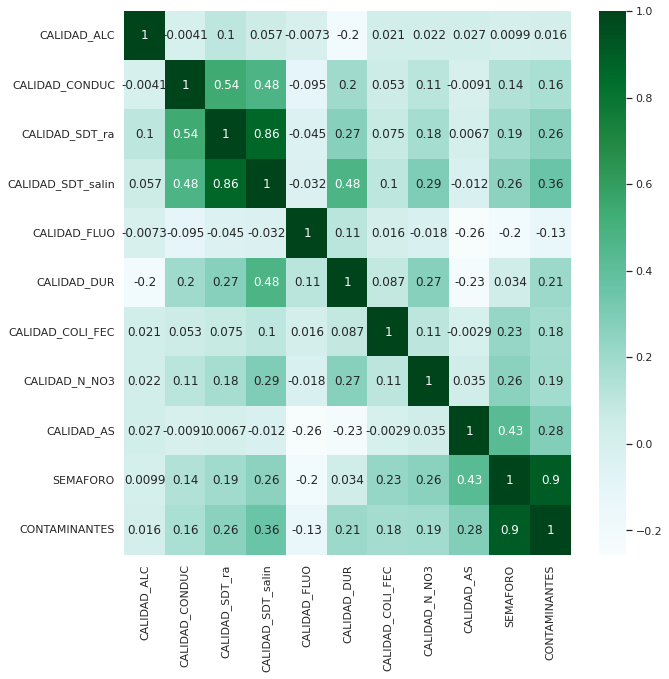

In [143]:
# IMPRESION DE LA MATRIZ DE CORRELACION DE PEARSON
sns.set(rc={'figure.figsize':(10,10)}) 
correlacionPearson = subterranero_copy.corr(method='pearson')
sns.heatmap(correlacionPearson, cmap = 'BuGn',annot=True)
plt.show()

Despues de realizar la limpieza, hemos determinado que estas columnas son las que más valor aportan a estudio.
Dado que no tienen una correlacion fuerte una de la otra, significa que son independientes para el estudio

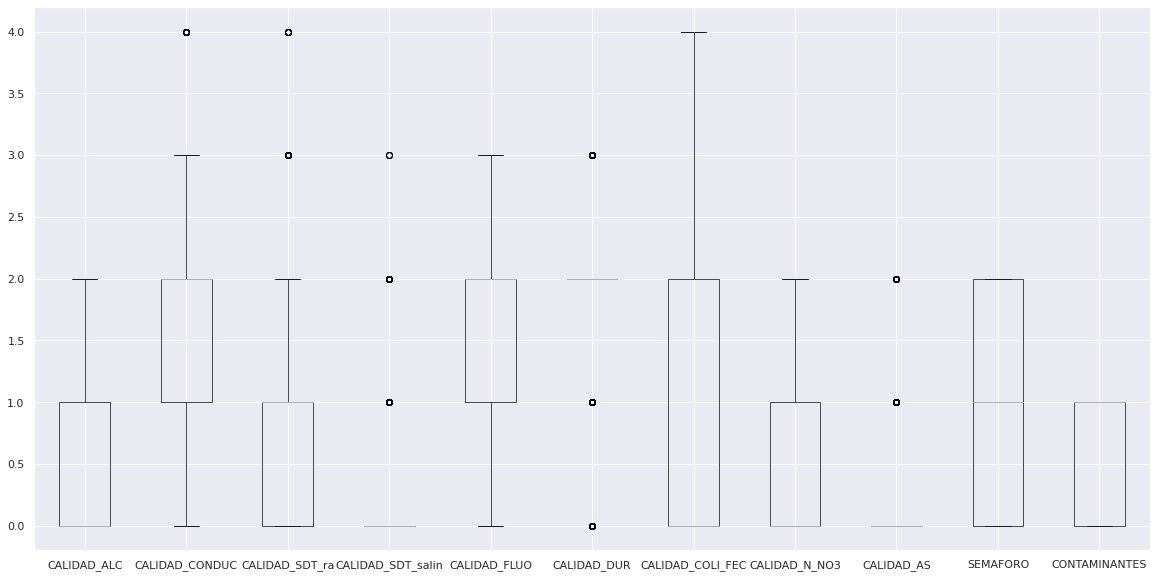

In [144]:
subterranero_copy.boxplot(figsize=(20,10))

## KMEANS

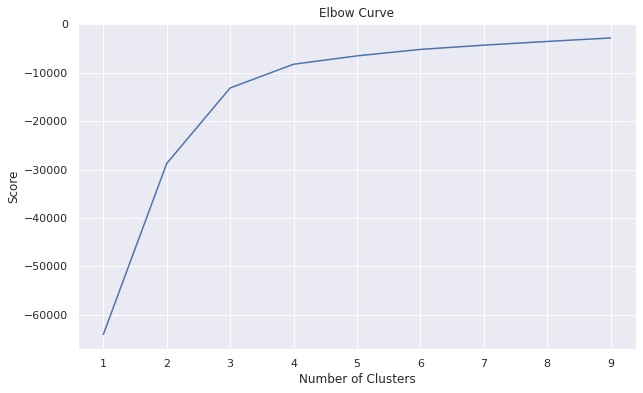

In [145]:
# KMEANS PARA LATITUD Y LONGITUD
numero_de_closters = range(1,10) 
mi_kmeans = [KMeans(n_clusters=i) for i in numero_de_closters]

X_axis = df_subterraneo[['LONGITUD','LATITUD']]
calulo_kmeans = [mi_kmeans[i].fit(X_axis).score(X_axis) for i in range(len(mi_kmeans))]

plt.figure(figsize=(10,6))
plt.plot(numero_de_closters, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()


In [146]:
# KMEANS PARA 4 CLUSTERS
kmeans = KMeans(n_clusters = 4) 
X=df_subterraneo[['LONGITUD','LATITUD']]
kmeans.fit(X)
# ahora guardamos los resultados
labels = kmeans.labels_
print(labels)
centroids = kmeans.cluster_centers_
print(centroids)

[0 0 3 ... 3 3 3]
[[-100.2286467    20.26114492]
 [-111.44537124   28.7340166 ]
 [ -90.09271578   19.6502625 ]
 [-103.66584078   24.77478631]]


In [147]:
centroides_df = pd.DataFrame(centroids) #Transformamos a dataframe para facilidad de uso
centroides_df["Coordinates"] = list(zip(centroides_df[0], centroides_df[1])) #hacemos una columna con latitud y longitud
centroides_df["Coordinates"] = centroides_df["Coordinates"].apply(Point) 
centroides_df.head()

cent = gpd.GeoDataFrame(centroides_df, geometry="Coordinates") #Geopandas requiere coordenadas para funcionar
cent

,0,1,Coordinates
0,-100.228647,20.261145,POINT (-100.22865 20.26114)
1,-111.445371,28.734017,POINT (-111.44537 28.73402)
2,-90.092716,19.650263,POINT (-90.09272 19.65026)
3,-103.665841,24.774786,POINT (-103.66584 24.77479)


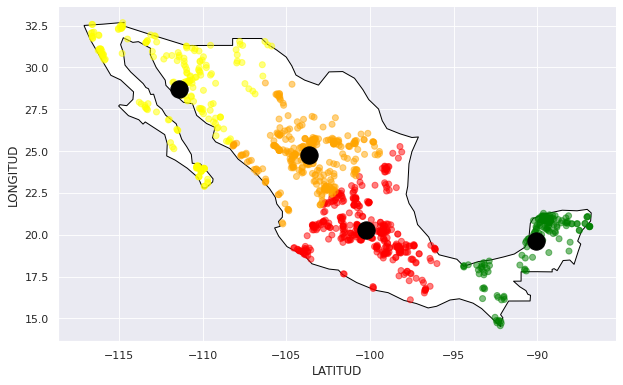

In [148]:
puntos_en_mapa = gpd.GeoDataFrame(subterranero_copy['COORDENADAS'], geometry="COORDENADAS")

colores = ['red','yellow','green','orange']
color_asig = []

for row in labels:
  color_asig.append(colores[row])

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
puntos_en_mapa.plot(ax=gax, color=color_asig, alpha = 0.5)
cent.plot(ax=gax, color='black', alpha = 1, markersize = 300)
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)


In [164]:
geolocator = Nominatim(user_agent="my-application") #Inicializamos la libreria
tienda=list()
tienda.append(str(centroids[0][1])+','+str(centroids[0][0]))
tienda.append(str(centroids[1][1])+','+str(centroids[1][0]))
tienda.append(str(centroids[2][1])+','+str(centroids[2][0]))
tienda.append(str(centroids[3][1])+','+str(centroids[3][0]))


for i in tienda:
    print("Centroide esta en: {}".format(geolocator.reverse(i)))
    print(i)
    print("+"*20)

Centroide esta en: Amealco de Bonfil, Querétaro, México
20.261144915343916,-100.2286466957672
++++++++++++++++++++
Centroide esta en: Granja el Charro, Hermosillo, Sonora, México
28.73401659708738,-111.44537124271844
++++++++++++++++++++
Centroide esta en: Municipio de Campeche, Campeche, México
19.6502625,-90.09271577777778
++++++++++++++++++++
Centroide esta en: Cuencamé, Durango, México
24.774786307453414,-103.6658407795031
++++++++++++++++++++


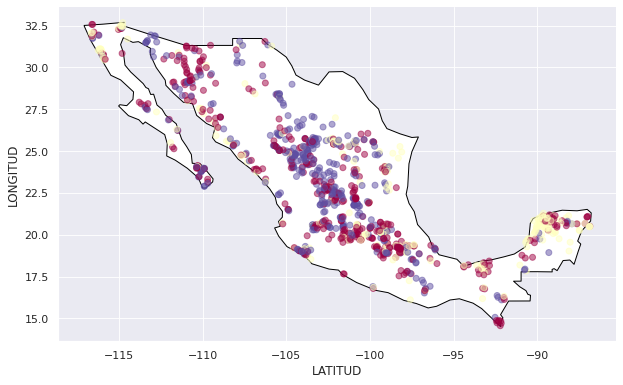

In [149]:
puntos_en_mapa = gpd.GeoDataFrame(subterranero_copy['COORDENADAS'], geometry="COORDENADAS")

colores = ['red','yellow','green','orange']
color_asig = []

for row in labels:
  color_asig.append(colores[row])

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
puntos_en_mapa.plot(ax=gax,cmap="Spectral",column=subterranero_copy['SEMAFORO'], alpha = 0.5)
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)


## Conclusiones

En el presente estudio, se evaluó por medio del algoritmo Kmeans si existía algún patrón reconocible que señalara una relación entre la calidad del agua y su ubicación geográfica.
Analizando los resultados, el algoritmo determino que una buena distribución de los centroides seria usando 4 clústeres.

Dichos clústeres se ubican en los estados de: Querétaro, Sonora, Campeche y Durango, los agrupamientos seleccionados por el Kmeans de muestran la existencia de un patrón que se relaciona con la ubicación geográfica y la calidad del agua.
Como lo podemos ver en el mapa generado, el algoritmo determino que la zona norte de la zona de baja california contiene una calidad de agua segura, la zona del norte que incluye sonora, Coahuila, monterrey la calidad del agua en su mayoría es mala. En contraste con las zonas sur del país la calidad del agua es buena y riesgo seguro para la población. 

Aunque cabe aclarar que el dataset original contenía mantos acuíferos que no representan un solo tipo de riesgo por región. Esto complica la forma en el que Kmean puede hacer las separaciones, por lo que se sugiere realizar otro tipo de algoritmo que pueda segmentar mejor la información dadas las limitaciones del algoritmo.

